### Machine Learning and Statistics - GMIT
#### Jody Bradley (G00387878) | Due date 08/01/2021

----------------

#### Introduction
We have been tasked with creating a web service that uses machine learning to predict wind turbine power output from wind speed values, as in the data set provided ("powerproduction.csv").

#### Linear Regression in Python
Regression searches for relationships among variables. Regression is useful when you want to forecast a response using a new set of predictors [1]. In this instance, we can use regression to predict wind turbine power outputs from wind speed values.

Linear regression is among the simplest regression methods, particularly with regards to its ease of interpretation.



Simple linear regression is a linear regression model with a single explanatory variable [2].


In [2]:
# Note: We have cleansed the data set to take into account days on which the turbines were inactive.
# This has been determined to be days on which wind speeds were greater than 5mph, however, no power
# was generated. This was deeemed prudent in order to give a more accurate result.

import pandas as pd
import seaborn as sns

df = pd.read_csv('powerproduction.csv')
col=['speed','power']

# Let's see if the data has loaded correctly. If so, the headings and first 10
# rows will show - yes they do.
print(df.head(n=11))


    speed  power
0   0.000  0.000
1   0.125  0.000
2   0.150  0.000
3   0.225  0.000
4   0.275  0.000
5   0.325  4.331
6   0.400  5.186
7   0.450  3.826
8   0.501  1.048
9   0.526  5.553
10  0.551  6.498


In [3]:
# View a basic statistical overview of the dataset:
print(df.describe())

            speed       power
count  477.000000  477.000000
mean    12.408323   50.329753
std      7.104189   41.215095
min      0.000000    0.000000
25%      6.181000    6.511000
50%     12.487000   47.268000
75%     18.519000   93.964000
max     24.399000  113.556000


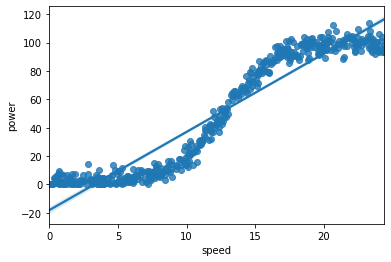

In [4]:
# Take the two variables from our data set.
production = df[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=df)


In [7]:
# TRAIN

import sklearn.linear_model as lin

x = production["speed"].to_numpy()
y = production["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)

r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]


In [8]:
# The r (relationship) value is a measure of how well the line fits the data set. The r
# value ranges from 0 to 1, where 0 means no relationship and 1 means 100% related [[2.] https://www.w3schools.com/python/python_ml_linear_regression.asp].

r

0.9033294610539289

In [9]:
p

[-18.089448231194737, 5.513976519830959]

In [10]:
# Predict. If we have the wind speed (x), how much power would be generated?

def f(x, p):
    return p[0] + x * p[1]

def predict(x, p):
    return f(x, p)

In [11]:
predict(15, p)

64.62019956626965

In [12]:
# The above returns a predicted power output of 64.620 for a wind speed of 15 mph which looks ok.
# However, when we try with a lower number, we get a negative output which can't be right. What can we do here?

predict(2, p)

-7.061495191532819

#### Polynomial Regression 

Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points. This is best suited when your data points will nto fit a linear regression [4].


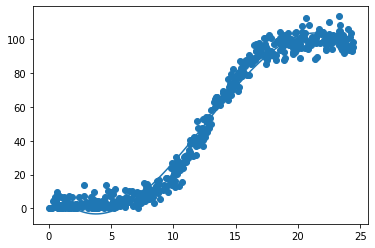

0.9785340997342342


In [16]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

x = production["speed"].to_numpy()
y = production["power"].to_numpy()

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 22, 100)

# Draw the line of Polynomial Regression:  
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

# Show the r-squared value. This ranges from 0 to 1, where 0 means no relationship and 1 means 100% related.
print(r2_score(y, mymodel(x)))


In [18]:
# The above r-squared number of 0.978534 shows that there is a very strong relationship.
# We can use polynomial regression in future predictions. 

# how can we use polynomial regression to make a prediciton?

# mymodel = np.poly1d(np.polyfit(x, y, 3))

power = mymodel(15)
    
print(power)

71.5832859107256


NOTE: Unfortunately while I tried several approaches, I was unable to succesfully host the polynomial regression model on a working API for the purpose of this assignment. 


#### References
[1.] https://realpython.com/linear-regression-in-python/

[2.] https://en.wikipedia.org/wiki/Simple_linear_regression

[3.] https://towardsdatascience.com/step-by-step-guide-building-a-prediction-model-in-python-ac441e8b9e8b

[4.] https://www.w3schools.com/python/python_ml_polynomial_regression.asp